# Winter 2026 COMP 579 Assignment 1 

Group: 

Name:

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

5. Answer questions in the Answer block.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [2]:

class BernoulliBandit:
  """
    A class representing a Bernoulli multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    probs : list or np.ndarray
        List of success probabilities for each arm (values between 0 and 1).

    Methods
    -------
    sample(arm_index)
        Samples a reward (0 or 1) from the specified arm based on a Bernoulli distribution.
    """

  # TODO:
  def __init__(self, num_arms, probs=None):
    self.num_arms = num_arms
    self.probs = probs

  def sample(self, arm_index):

    res = np.random.binomial(1, self.probs[ arm_index ], size=None)

    return res


In [3]:
# TODO:
delta = 0.2
num_arms = 3
probs = [0.5, 0.5 - delta, 0.5 + delta]
num_samples = 50

three_arm_bernoulli_bandit = BernoulliBandit(num_arms, probs)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    rewards=[]
    # Store 50 samples per action
    for num in range(num_samples):
        rewards.append( three_arm_bernoulli_bandit.sample( action ) )
    action_rewards.append(rewards)


### Graphs

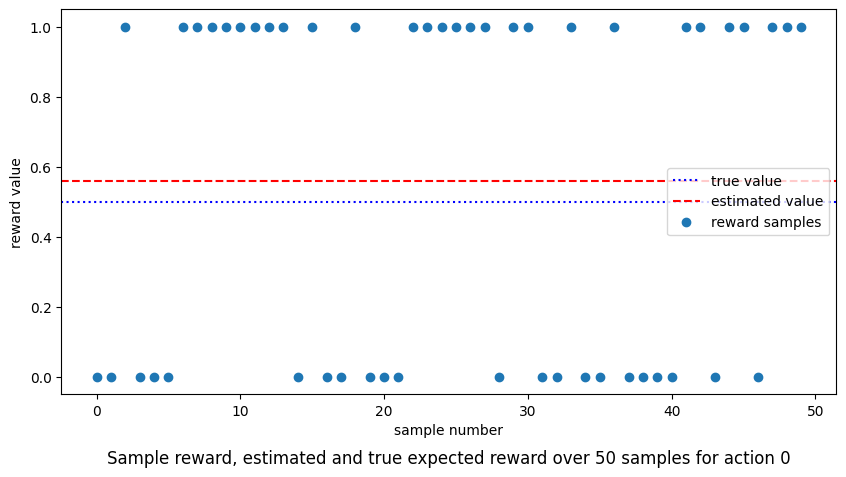

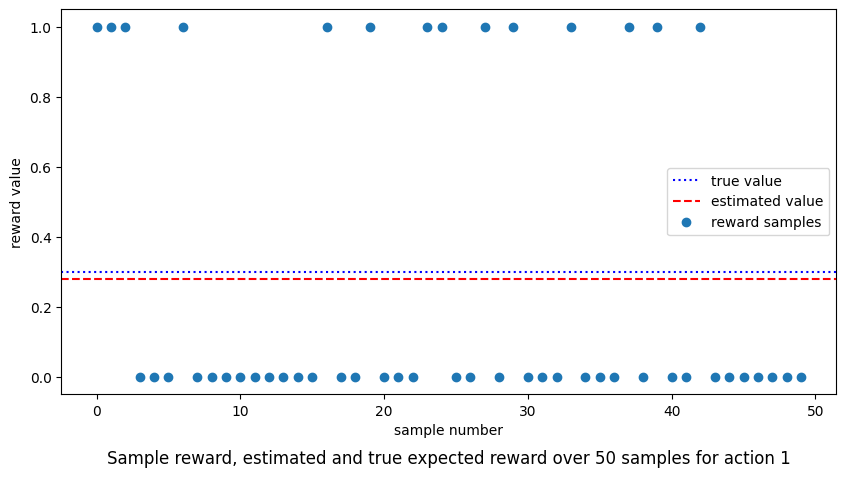

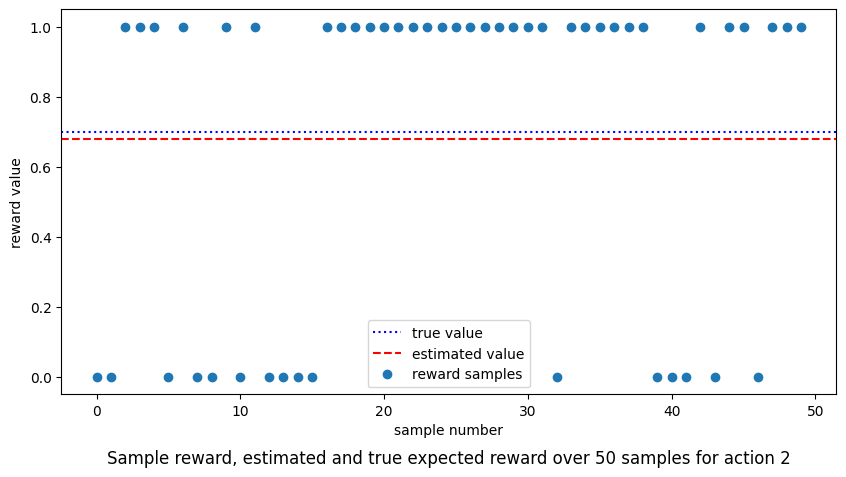

In [4]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = probs[action]
  estimated_value = np.array(action_rewards[action]).mean()

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [5]:
def update(reward_samples, alpha):
  """Yields incremental average with fixed learning rate alpha."""
  Q = 0.0
  for r in reward_samples:
        Q = Q + alpha * (r - Q)
        yield Q


def updateAvg(reward_samples):
  """Yields incremental sample average."""
  Q = 0.0
  t = 0.0
  for r in reward_samples:
        t += 1
        Q = Q + (1.0 / t) * (r - Q)
        yield Q


### Graphs

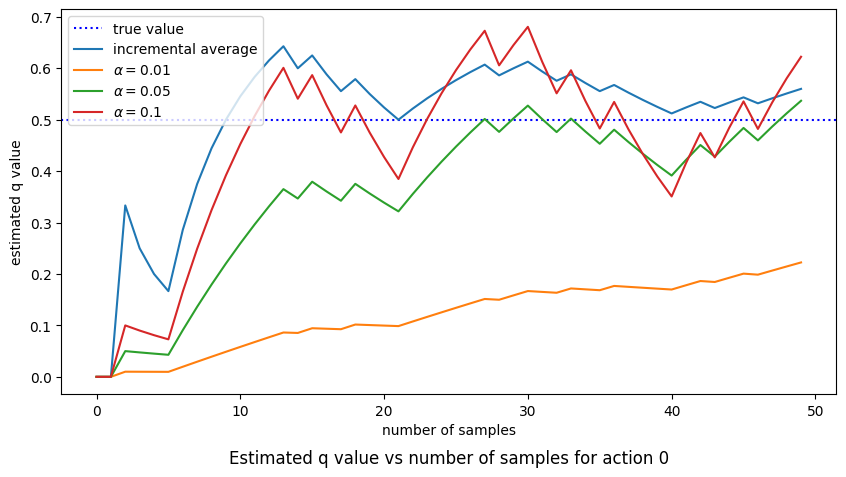

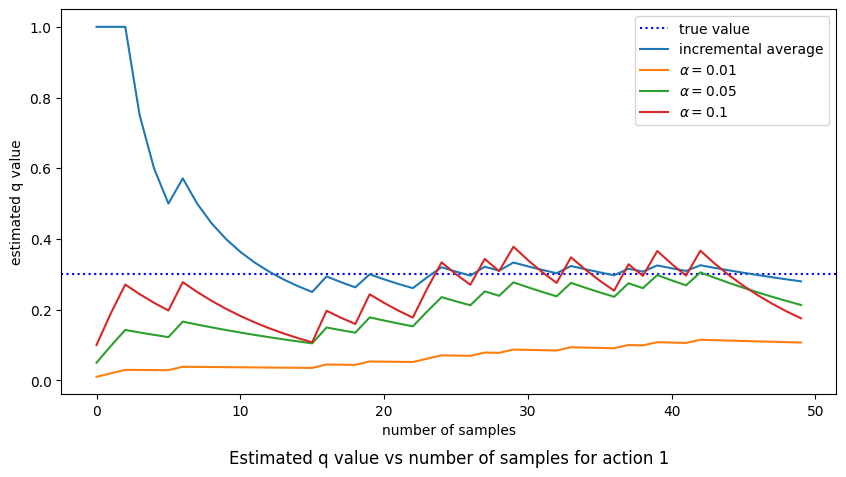

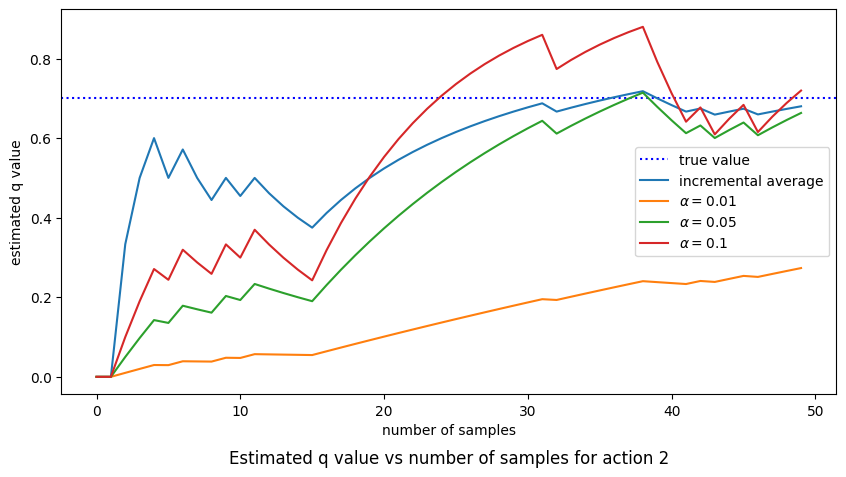

In [6]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  incr_avgs = list(updateAvg(action_rewards[action]))
  alpha_1_percent = list(update(action_rewards[action], alpha=0.01))
  alpha_5_percent = list(update(action_rewards[action], alpha=0.05))
  alpha_10_percent = list(update(action_rewards[action], alpha=0.10))
  true_value = probs[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_5_percent, = ax.plot(alpha_5_percent, label = r"$\alpha = 0.05$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")

  ax.set_xlabel("number of samples")
  ax.set_ylabel("estimated q value")
  ax.set_title("Estimated q value vs number of samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_5_percent, plt_alpha_10_percent])

## Q3 Effect of $α$ on Estimated Q values

In [7]:
# TODO:
num_samples = 100
num_runs = 100

incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_5_percent_runs = []
alpha_10_percent_runs = []


# TODO:
for run in range(num_runs):
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_5_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []

  action_rewards=[]

  for action in actions:

    
    rewards=[]
    for num in range(num_samples):
      rewards.append( three_arm_bernoulli_bandit.sample( action ) )
    action_rewards.append(rewards)
       

    sample_incr_avgs_by_actions.append( list(updateAvg(action_rewards[action])) )
    sample_alpha_1_percent_by_actions.append( list(update(action_rewards[action], alpha=0.01)) )
    sample_alpha_5_percent_by_actions.append( list(update(action_rewards[action], alpha=0.05)) )
    sample_alpha_10_percent_by_actions.append( list(update(action_rewards[action], alpha=0.10)) )

  incr_avgs_runs.append(np.asarray(sample_incr_avgs_by_actions))
  alpha_1_percent_runs.append(np.asarray(sample_alpha_1_percent_by_actions))
  alpha_5_percent_runs.append(np.asarray(sample_alpha_5_percent_by_actions))
  alpha_10_percent_runs.append(np.asarray(sample_alpha_10_percent_by_actions))

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_5_percent_runs = np.asarray(alpha_5_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)

In [8]:
incr_avgs_runs.shape

(100, 3, 100)

### Graphs

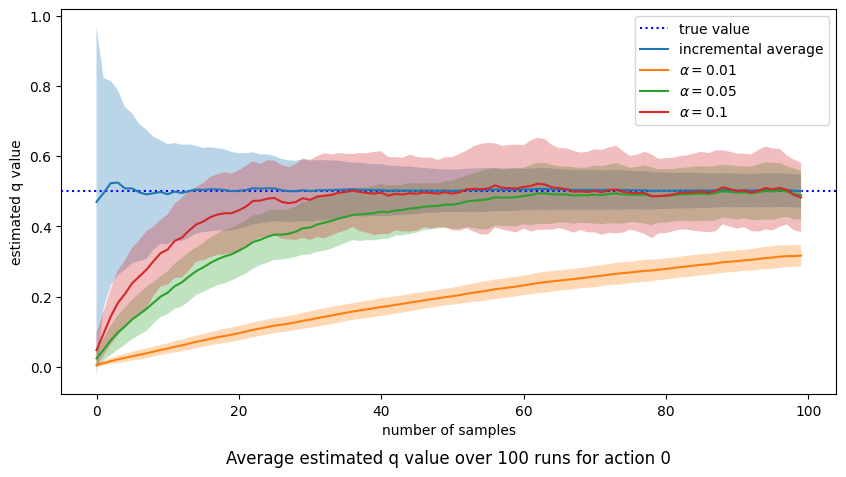

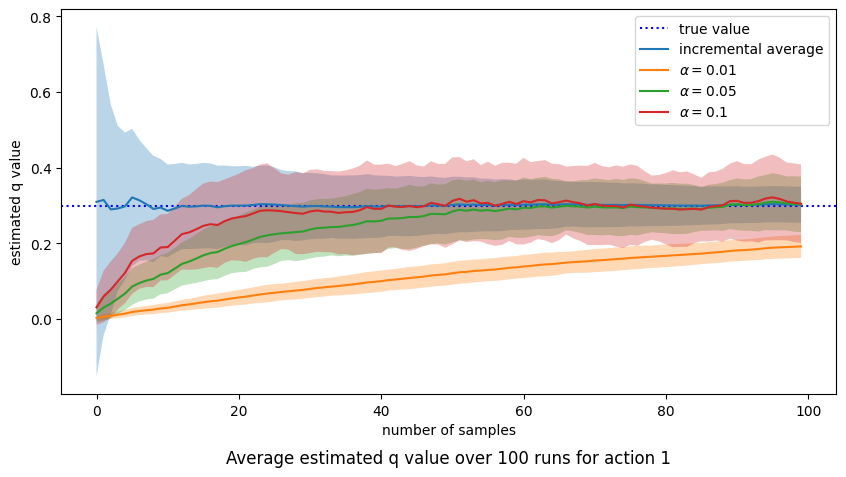

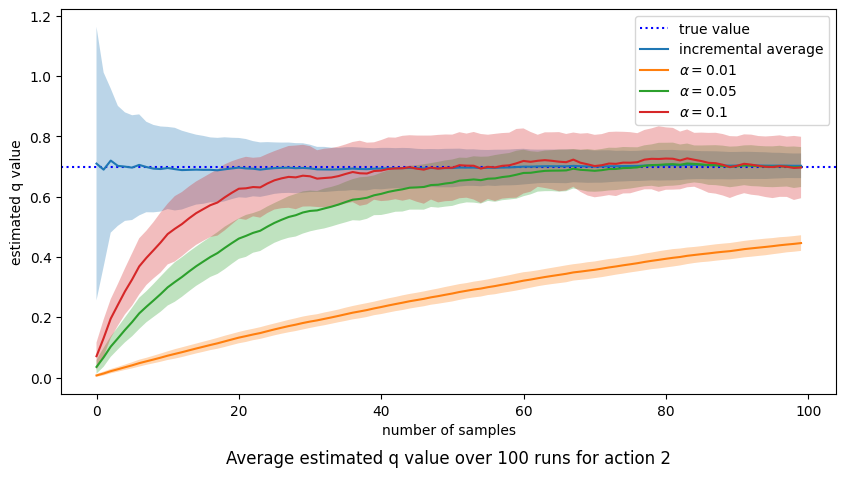

In [9]:
from pdb import set_trace as bp
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values
  # TODO:
  
  mean_incr_avgs_by_actions = incr_avgs_runs[:, action, :].mean(axis=0)
  mean_alpha_1_percent_by_actions = alpha_1_percent_runs[:, action, :].mean(axis=0)
  mean_alpha_5_percent_by_actions = alpha_5_percent_runs[:, action, :].mean(axis=0)
  mean_alpha_10_percent_by_actions = alpha_10_percent_runs[:, action, :].mean(axis=0)

  true_value = probs[action]

  std_err_incr_avgs_by_actions = incr_avgs_runs[:, action, :].std(axis=0)
  std_err_alpha_1_percent_by_actions = alpha_1_percent_runs[:, action, :].std(axis=0)
  std_err_alpha_5_percent_by_actions = alpha_5_percent_runs[:, action, :].std(axis=0)
  std_err_alpha_10_percent_by_actions = alpha_10_percent_runs[:, action, :].std(axis=0)


  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = r"$\alpha = 0.01$")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.05
  plt_alpha_5_percent, = ax.plot(mean_alpha_5_percent_by_actions, label = r"$\alpha = 0.05$")
  # draw the error bar/area for alpha = 0.05
  alpha_5_percent_minus_std_err = mean_alpha_5_percent_by_actions - std_err_alpha_5_percent_by_actions
  alpha_5_percent_plus_std_err = mean_alpha_5_percent_by_actions + std_err_alpha_5_percent_by_actions
  ax.fill_between(range(0,100), alpha_5_percent_minus_std_err, alpha_5_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = r"$\alpha = 0.1$")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)

  ax.set_xlabel("number of samples")
  ax.set_ylabel("estimated q value")
  ax.set_title("Average estimated q value over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_5_percent, plt_alpha_10_percent])

### Answers


The incremental average seems to reach the true value faster even if its initial variability is larger than that of the fixed-alpha methods during the first number of saples. Variasbility decreases over time.

When using fixed learning rates, we observe that variability tends to persist over time, and the estimates take longer to approach the true Q value. With an alpha of 0.01, the Q value is not fully approached within the observed horizon due to the very slow learning behavior, although this setting clearly exhibits lower variance than the larger alphas. For alpha equal to 0.1, learning is much faster and the estimate approaches the true Q value more quickly but the variability remains high even after reaching the true value. The alpha of 0.05 shows intermediate behavior, learning faster than 0.01 while maintaining lower variance than 0.1

The choice of the next alpha values to explore depends on the goal of the task. If lower variance is preferred, values between 0.01 and 0.05 would be worth exploring, since they can still reach the true value within fewer than 100 samples while maintaining more stable estimates. If faster convergence is the priority, then alpha values between 0.05 and 0.1 would be more appropriate.

## Q4 Epsilon-greedy

In [10]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  Q_arr = [0 for n in range(num_arms)]
  N_arr =  [0 for n in range(num_arms)]
  total_R = 0
  total_l = 0
  actions = [n for n in range(num_arms)]

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  epsilon_t = epsilon

  for time_step in range(num_time_step):
    if epsilon_decay:
        epsilon_t = epsilon / ( 1 + time_step * lambda_)

    opt_value = max(Q_arr)

    if Q_arr.count(opt_value) > 1:
        # If there are many best actions
        best_action = random.choice( [i for i, x in enumerate(Q_arr) if x == opt_value] )
    else:
        #If there is only one top action
        best_action = Q_arr.index( opt_value )

    A_star = best_action
    A_random = np.random.choice( actions )
    A = np.random.choice([ A_star , A_random ],  p=[ 1 - epsilon_t , epsilon_t])

    curr_R = bandit.sample( A )
    N_arr[A] =  N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + (1.0 / N_arr[A]) * (curr_R - Q_arr[A])
        
    else:
      Q_arr[A] = Q_arr[A] + alpha * (curr_R - Q_arr[A])

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    avg_R = total_R / (time_step + 1)
    total_R_over_t.append(avg_R)

    mu = bandit.probs
    mu_star = max(mu)

    est_is_best = 1 if A == mu.index(mu_star) else 0
    est_is_best_over_t.append(est_is_best)

    l_t = mu_star - mu[A]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

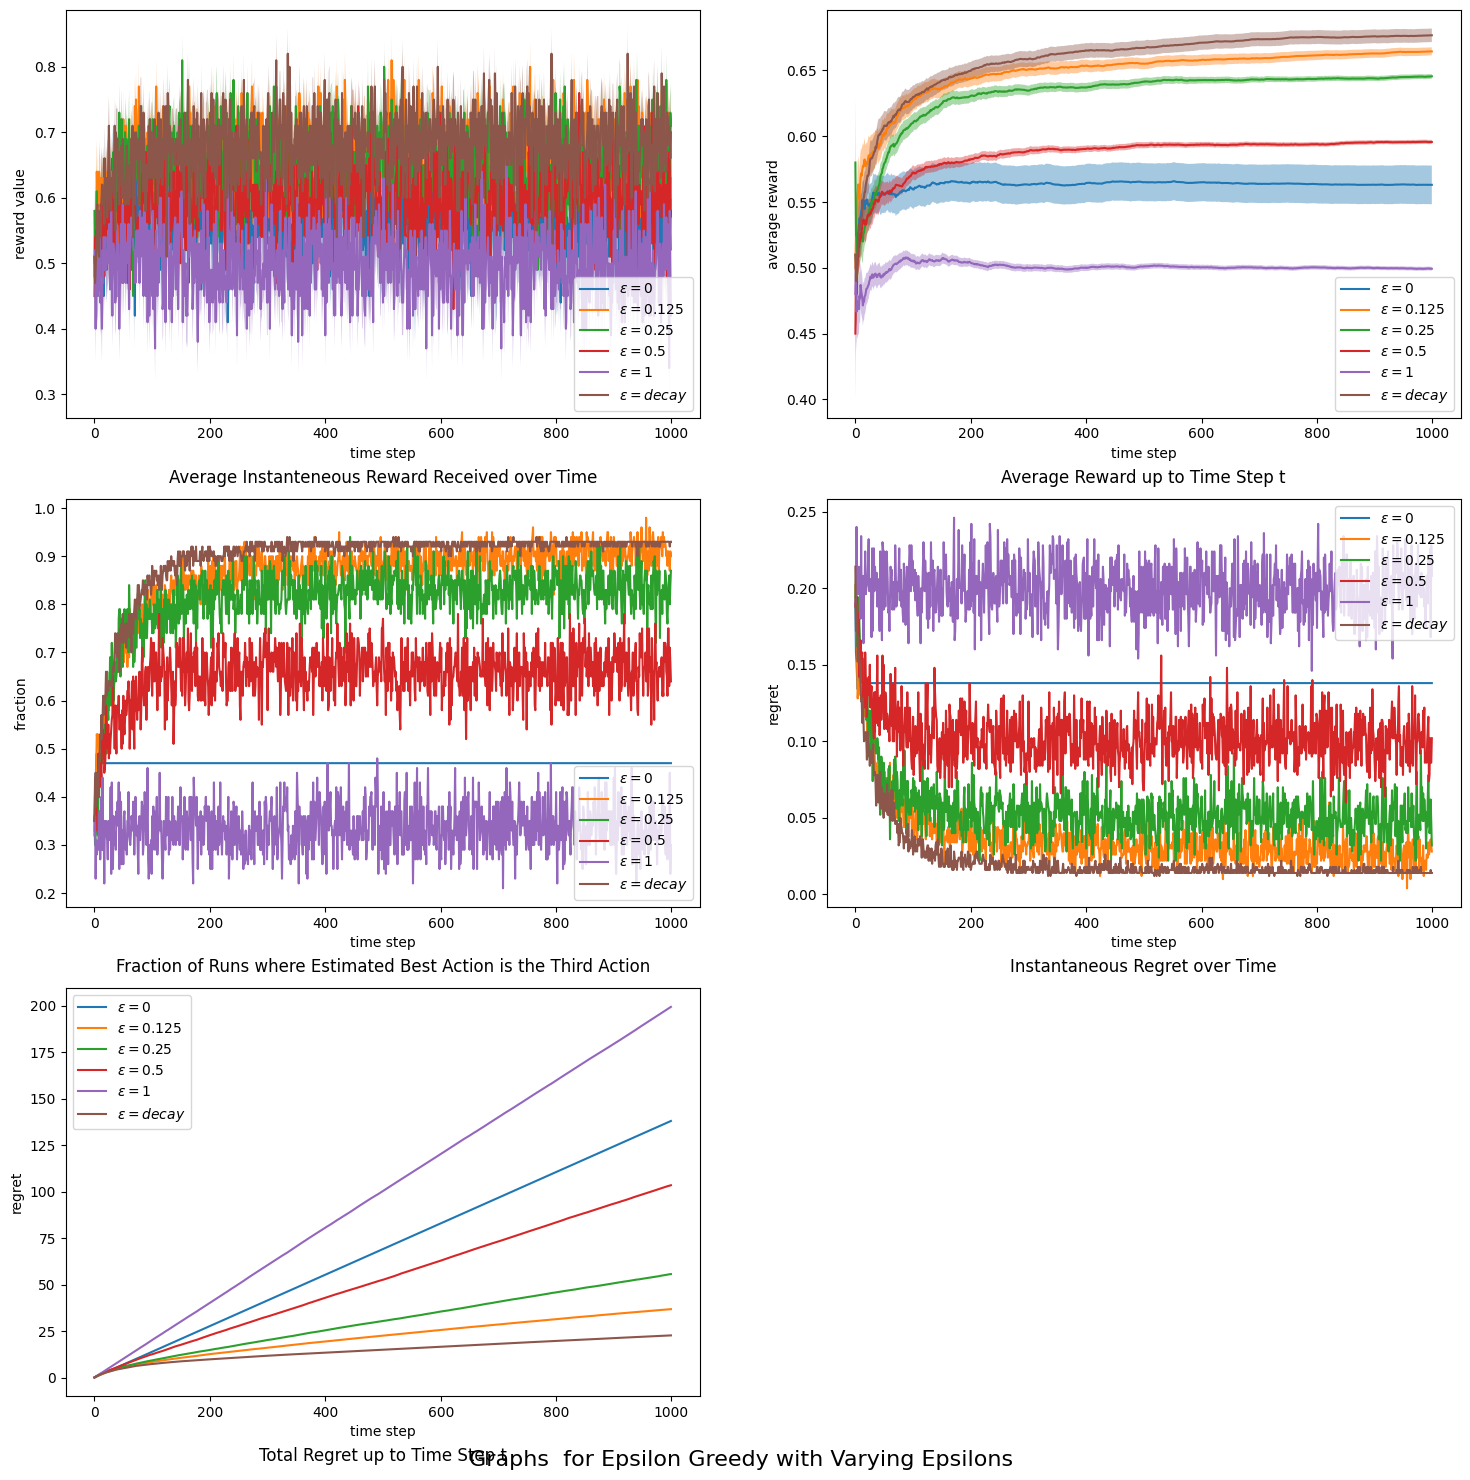

In [11]:
#TODO:
epsilons = [ 0, 1/8, 1/4, 1/2, 1 ]
decaying_epsilon_params = {'epsilon_0': 0.5 , 'lambda_': 0.1}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_bernoulli_bandit,
          decaying_epsilon_params['epsilon_0'],
          epsilon_decay=True,
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_bernoulli_bandit,
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Runs where Estimated Best Action is the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

In the "total regret up to time step" graph, we can see that the only approach with logarithmic behavior is the ε-decay strategy. All of the others grow linearly. However, ε = 1 clearly has the largest slope, making it the worst option.

In the "instantaneous regret over time" plot, we see that ε-decay is the strategy that minimizes regret the most over time. For ε = 0, we can say that the instantaneous regret is very stable, since it always makes the same choice (the best one up to that point). The other values of ε tend toward a particular value in the limit. The only approach that seems to get closer to zero is ε-decay.

In the “Fraction of Runs where the Estimated Best Action is the Third Action” graph, we again see that the best behavior comes from ε-decay, while the worst is ε = 1, and the most stable is ε = 0. This means that ε-decay learns faster than the others that the third action is the best one; however, it does not completely stop exploring the other possibilities.

In the “Average Reward up to Time Step t” graph, we observe that all approaches plateau toward a certain value, except for the ε-decay configuration. The worst case is ε = 1, while the others show improvement over time.

Finally, in the “Average Instantaneous Reward Received over Time” plot, we can see that, on average, the best instantaneous reward corresponds to ε-decay. However, due to the noise in the plot, it is difficult to make other detailed observations

Overall, the graphs show that choosing ε = 1 is the worst option, since actions are selected completely at random and no exploitation takes place.

On the other hand, ε = 0 is also not optimal. Always choosing the estimated best action without exploration can lead to suboptimal behavior if the early estimates are incorrect.

For values of ε between 0 and 1, we observe different behaviors, all of which perform better than the extreme cases ε = 0 and ε = 1.

The best overall strategy is clearly the decaying ε approach, as this behavior is consistently observed across all the graphs.

## Q6 Gradient Bandit

In [12]:
def gradient_bandit(bandit, temperature, num_steps=1000, baseline=True):
  """Gradient bandit algorithm with softmax (Boltzmann) action selection."""
  #TODO:
  num_arms = bandit.num_arms

  H = np.zeros(num_arms, dtype=float)
  N =  np.zeros(num_arms, dtype=float)
  b = 0

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  total_R = 0
  total_l = 0

  for t in range(num_steps):


    # Softmax policy with temperature:

    # pi(a) = exp(H(a)/T)

    logits = H / temperature
    logits -= logits.max()  # stability
    exp_logits = np.exp(logits)
    pi = exp_logits / exp_logits.sum()


    # Sample action from pi
    action = np.random.choice( range(num_arms) , p=pi)
    reward = bandit.sample( action )


    
    if baseline:
      b += (reward - b) / (t + 1)
    else:
      b = 0

    # Not explicit on instructions
    alpha = 0.1

    N[action] += 1 
  
    for a in range(num_arms):
            if a == action:
                H[a] += alpha * (reward - b) * (1 - pi[a])
            else:
                H[a] -= alpha * (reward - b) * pi[a]

    # Track metrics
    R_over_t.append(reward)
    
    total_R += reward
    avg_R = np.mean(R_over_t)
    total_R_over_t.append(avg_R)





    mu = bandit.probs
    mu_star = max(mu)

    est_is_best = 1 if action == mu.index(mu_star) else 0
    est_is_best_over_t.append(est_is_best)

    l_t = mu_star - mu[action]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)





  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

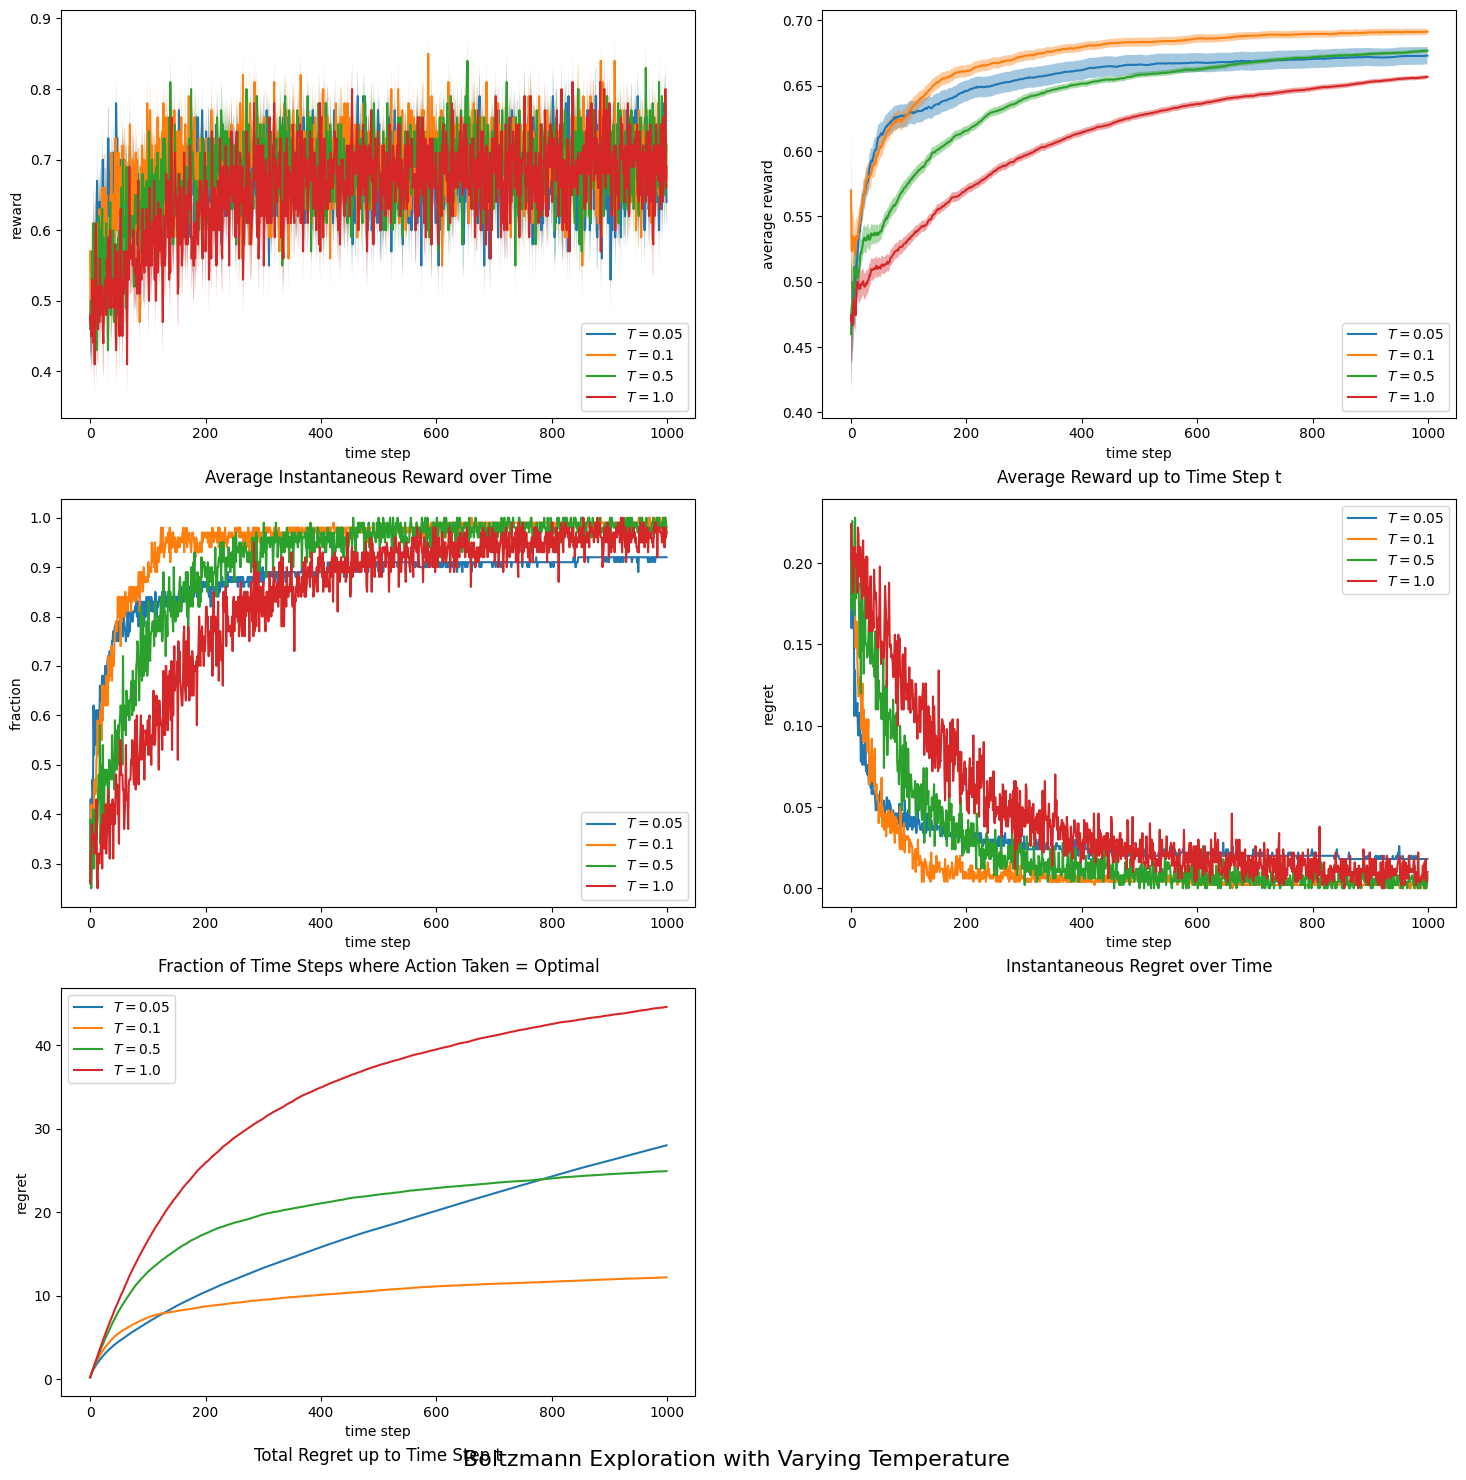

In [13]:
#TODO:

temperatures = [0.05,0.1,0.5,1.0]
num_steps = 1000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for temperature in temperatures:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
        three_arm_bernoulli_bandit, temperature, num_steps=num_steps, baseline=True)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # Plot 1: mean reward over time
  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,0].plot(mean_R_over_t_runs, label=rf"$T = {temperature}$")
  axs[0,0].fill_between(range(num_steps), mean_R_over_t_runs - std_err_R_over_t_runs, 
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward")
  axs[0,0].set_title("Average Instantaneous Reward over Time", y=-0.18)

  # Plot 2: average reward up to time step t
  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,1].plot(mean_total_R_over_t_runs, label=rf"$T = {temperature}$")
  axs[0,1].fill_between(range(num_steps), mean_total_R_over_t_runs - std_err_total_R,
                        mean_total_R_over_t_runs + std_err_total_R, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  # Plot 3: fraction optimal action
  est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  axs[1,0].plot(est_is_best_avgs, label=rf"$T = {temperature}$")

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Time Steps where Action Taken = Optimal", y=-0.18)

  # Plot 4: instantaneous regret
  l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_avgs, label=rf"$T = {temperature}$")

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  # Plot 5: total regret
  total_l_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_avgs, label=rf"$T = {temperature}$")

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

fig.suptitle("Boltzmann Exploration with Varying Temperature", fontsize=16, y=0.08)
plt.show()

### Answers

A very low temperature, 0.05 in this case, makes the “learning” process faster but less efficient. This can be seen in the “instantaneous regret over time” plot, where the T = 0.05 curve plateaus at a higher level, accumulating more regret than the other options. A similar behavior appears in the “Fraction of Time Steps where Action Taken = Optimal” plot, since T = 0.05 evolves more slowly than the other options, plateauing at a smaller fraction than all of them.

On the other hand, T=1.0 can be very slow, but it is more consistent, choosing the correct action more often than T=0.05 near 1000 time steps. However, its average reward over the 1000 steps is smaller than that of the other configurations which indicates that learning progresses more slowly

For this particular case, the best temperature is T =0.1. It provides the best balance for this problem. One conclusion that can be drawn from these plots is that a higher temperature leads to more exploration but slower learning, while a lower temperature leads to faster learning but is more prone to prematurely committing to a suboptimal action.

## Q7 Thompson Sampling

In [14]:
def Thompson_sampling(bandit, alpha_prior=1, beta_prior=1, T=1000):
  """Thompson Sampling for Bernoulli bandit using Beta priors.  """
  #TODO:

  num_arms = bandit.num_arms
  
  # Initialize Beta distribution parameters for each arm
  alpha = alpha_prior * np.ones(num_arms)
  beta = beta_prior * np.ones(num_arms)
  
  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  total_R = 0.0
  total_l = 0.0
  
  for t in range(T):

    mu = bandit.probs
    mu_star = max(mu)

    theta = np.random.beta(alpha, beta)
    
    max_theta = theta.max()

    # Sample action from theta
    candidates = np.flatnonzero(theta == max_theta)
    action = int(np.random.choice(candidates))

    reward = bandit.sample( action )
    
    # Update Beta posterior
    alpha[action] += 1 if reward == 1 else 0
    beta[action] += 1 if reward == 0 else 0
    
    # Track metrics
    R_over_t.append(reward)

    total_R += reward
    avg_R = np.mean(R_over_t)
    total_R_over_t.append(avg_R)

    est_is_best = 1 if action == mu.index(mu_star) else 0
    est_is_best_over_t.append(est_is_best)

    l_t = mu_star - mu[action]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)
  
  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

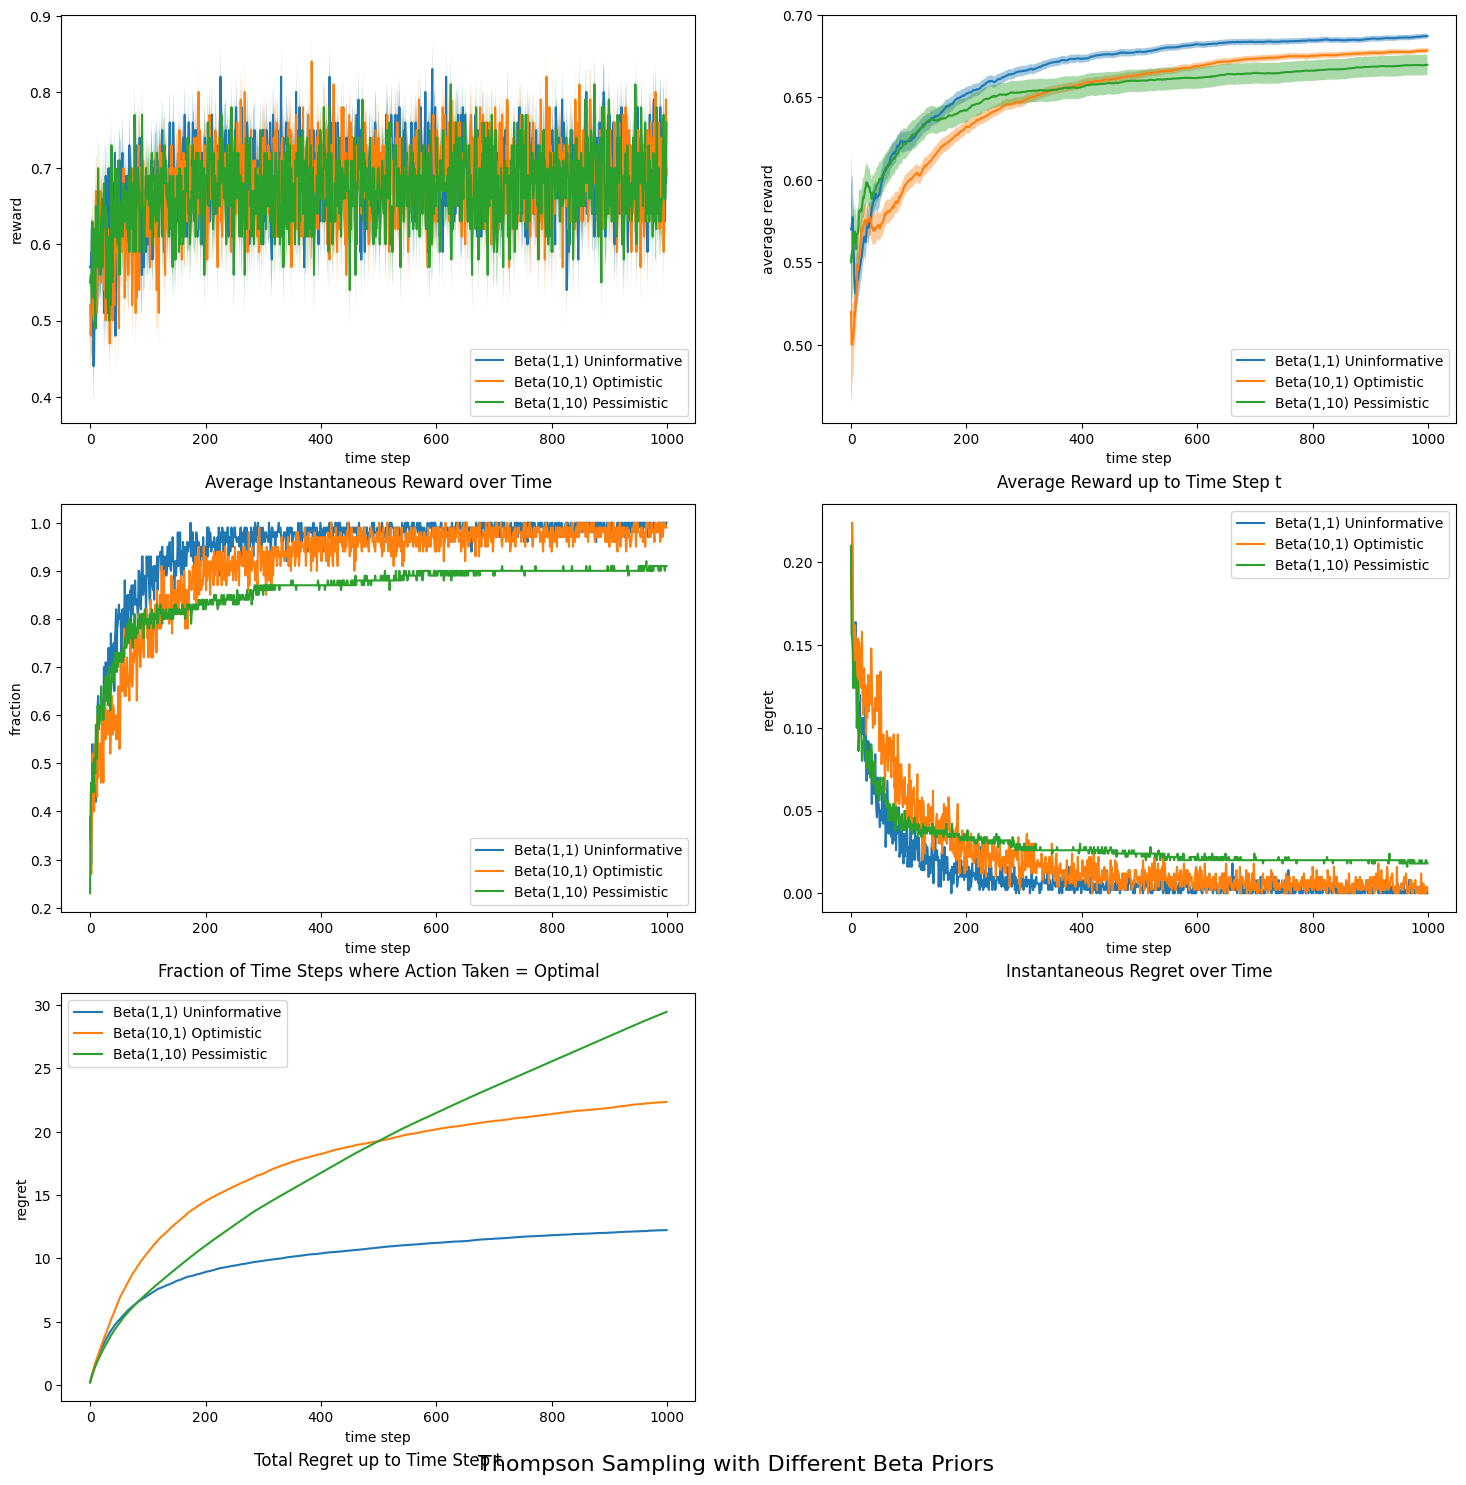

In [15]:
  #TODO:
priors = [(1,1),(10,1),(1,10)]  
prior_names = [r"Beta(1,1) Uninformative", r"Beta(10,1) Optimistic", r"Beta(1,10) Pessimistic"]
T = 1000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for prior, prior_name in zip(priors, prior_names):
  alpha_prior, beta_prior = prior
  
  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(
        three_arm_bernoulli_bandit, alpha_prior=alpha_prior, beta_prior=beta_prior, T=T)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # Plot 1: mean reward over time
  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,0].plot(mean_R_over_t_runs, label=prior_name)
  axs[0,0].fill_between(range(T), mean_R_over_t_runs - std_err_R_over_t_runs, 
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward")
  axs[0,0].set_title("Average Instantaneous Reward over Time", y=-0.18)

  # Plot 2: average reward up to time step t
  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,1].plot(mean_total_R_over_t_runs, label=prior_name)
  axs[0,1].fill_between(range(T), mean_total_R_over_t_runs - std_err_total_R,
                        mean_total_R_over_t_runs + std_err_total_R, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  # Plot 3: fraction optimal action
  est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  axs[1,0].plot(est_is_best_avgs, label=prior_name)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Time Steps where Action Taken = Optimal", y=-0.18)

  # Plot 4: instantaneous regret
  l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_avgs, label=prior_name)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  # Plot 5: total regret
  total_l_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_avgs, label=prior_name)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

fig.suptitle("Thompson Sampling with Different Beta Priors", fontsize=16, y=0.08)
plt.show()

### Answers

As seen in the plots, the choice of prior does affect the early exploratory behavior. The uninformed prior seems to provide the best balance between exploration and exploitation, since it has the lowest total regret up to time step 1000, accumulates the least instantaneous regret over time, reaches faster a high fraction of times where the chosen action is the optimal action, and achieves the highest average reward over time up to time step 1000

The pessimistic prior appears to be the worst in all of the plots. This due to the fact that a pessimistic initialization discourages exploration. When the algorithm tries one action and observes that it performs better than expected, it tends to favor that action more frequently than the others, which remain pessimistically valued due to the initialization. This slows down proper exploration of alternative actions.

The optimistic prior shows better behavior than the pessimistic one. However the overall best performance is still observed with the uninformed prior.

In the long term, the prior should not have a significant effect, since accumulated evidence from observed rewards will dominate the posterior distribution and correct the initial bias. However, as seen in the plots, it can take many time steps for this effect to fully materialize, meaning that the choice of prior mainly influences early and intermediate behavior rather than long-term performance.

## Q9 Non-stationary Environment

In [16]:
  #TODO:
class Non_stationary_Bandit:
    """Non-stationary Bernoulli bandit where arm probabilities swap every 500 steps."""
    
    def __init__(self, num_arms=3, probs=None, delta=0.2):
        self.num_arms = num_arms
        self.delta = delta
        self.probs =  probs
        self.t = 0

    def sample(self, arm_index):
        # Sample reward using current probs

        if self.t == 500:
            self.t = 0
            probs =  self.probs
            aux = probs[1]
            probs[1] = probs[2]
            probs[2] = aux
            self.probs =  probs

        reward = np.random.binomial(1, self.probs[ arm_index ], size=None)

        self.t += 1
        
        # Check if we need to swap for NEXT time step
        # Swap at t=500, 1000, 1500 (after 500, 1000, 1500 samples)
        
        return reward


### Graph


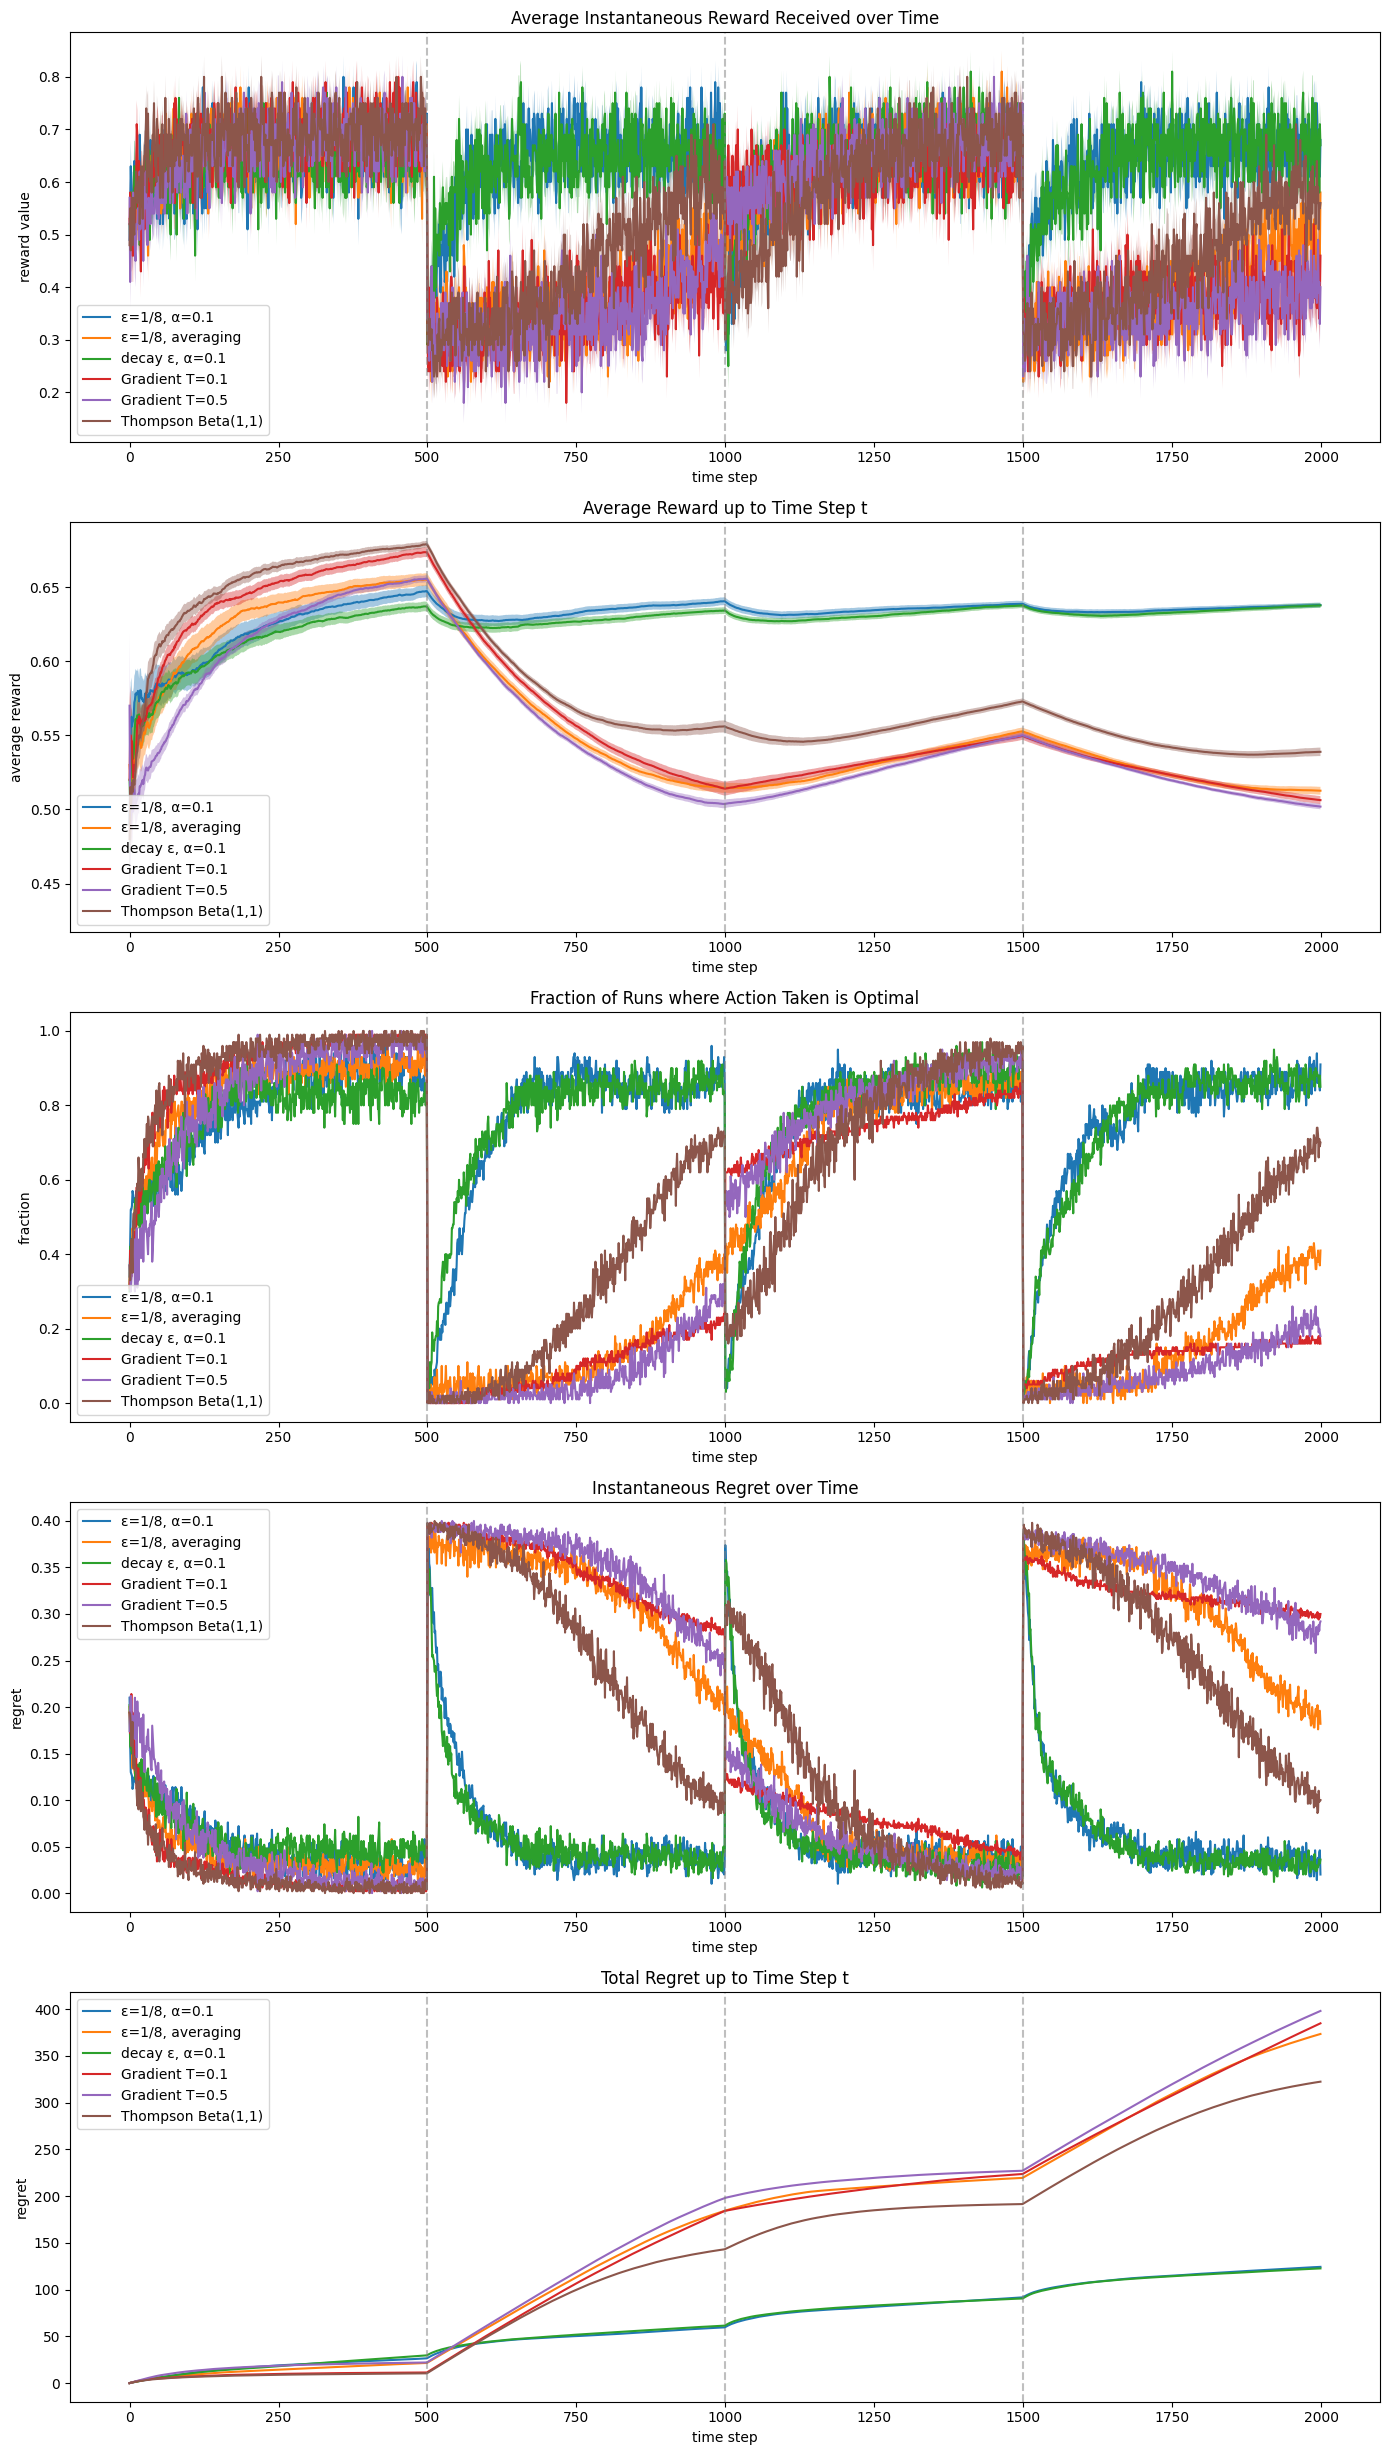

In [17]:
# Configuration for Q9
#TODO:
delta = 0.2
T = 2000
num_runs = 100

algorithms = [
    ("ε=1/8, α=0.1", "epsilon_greedy", {"epsilon": 1/8 , "alpha":0.1, "epsilon_decay":False, "lambda":0} ),
    ("ε=1/8, averaging", "epsilon_greedy", {"epsilon": 1/8 , "alpha":None, "epsilon_decay":False, "lambda":0}),
    ("decay ε, α=0.1", "epsilon_greedy", {"epsilon": 1/4 , "alpha":0.1, "epsilon_decay":True, "lambda":0.1}),
    ("Gradient T=0.1", "gradient_bandit", {"temperature":0.1}),
    ("Gradient T=0.5", "gradient_bandit", {"temperature":0.5}),
    ("Thompson Beta(1,1)", "thompson_sampling", {}),
]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(14, 25))

for alg_name, alg_type, alg_params in algorithms:

    # arrays of the data generated from 100 runs
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []

    for run in range(num_runs):
        # Create a fresh non-stationary bandit for each run
        bandit = Non_stationary_Bandit(num_arms=3, probs=[0.5, 0.5 - delta, 0.5 + delta], delta=delta)
        
        if alg_type == "epsilon_greedy":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                bandit, 
                epsilon=alg_params["epsilon"],
                alpha=alg_params.get("alpha"),
                num_time_step=T,
                epsilon_decay=alg_params.get("epsilon_decay", False),
                lambda_=alg_params.get("lambda_", 0.001)
            )
        elif alg_type == "gradient_bandit":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                bandit,
                temperature=alg_params["temperature"],
                num_steps=T,
                baseline=True
            )
        elif alg_type == "thompson_sampling":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(
                bandit,
                alpha_prior=1,
                beta_prior=1,
                T=T
            )

        R_over_t_runs.append(R_over_t)
        total_R_over_t_runs.append(total_R_over_t)
        est_is_best_over_t_runs.append(est_is_best_over_t)
        l_over_t_runs.append(l_over_t)
        total_l_over_t_runs.append(total_l_over_t)

    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # plot the mean reward over time
    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(num_runs)

    axs[0].plot(mean_R_over_t_runs, label=alg_name)
    axs[0].fill_between(range(T), mean_R_over_t_runs - std_err_R_over_t_runs, 
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

    axs[0].legend()
    axs[0].set_xlabel("time step")
    axs[0].set_ylabel("reward value")
    axs[0].set_title("Average Instantaneous Reward Received over Time")

    # plot the mean average reward up to time step t
    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(num_runs)

    axs[1].plot(mean_total_R_over_t_runs, label=alg_name)
    axs[1].fill_between(range(T), mean_total_R_over_t_runs - std_err_total_R_over_t_runs, 
                        mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)

    axs[1].legend()
    axs[1].set_xlabel("time step")
    axs[1].set_ylabel("average reward")
    axs[1].set_title("Average Reward up to Time Step t")

    # plot the fraction of optimal action
    est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
    axs[2].plot(est_is_best_over_t_runs_avgs, label=alg_name)

    axs[2].legend()
    axs[2].set_xlabel("time step")
    axs[2].set_ylabel("fraction")
    axs[2].set_title("Fraction of Runs where Action Taken is Optimal")

    # plot the mean instantaneous regret over time
    l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
    axs[3].plot(l_over_t_runs_avgs, label=alg_name)

    axs[3].legend()
    axs[3].set_xlabel("time step")
    axs[3].set_ylabel("regret")
    axs[3].set_title("Instantaneous Regret over Time")

    # plot the total regret over time
    total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
    axs[4].plot(total_l_over_t_runs_avgs, label=alg_name)

    axs[4].legend()
    axs[4].set_xlabel("time step")
    axs[4].set_ylabel("regret")
    axs[4].set_title("Total Regret up to Time Step t")

# Add vertical lines at probability swap points
for ax in axs:
    for swap_t in [500, 1000, 1500]:
        ax.axvline(x=swap_t, color='gray', linestyle='--', alpha=0.5)

fig.suptitle(' ', fontsize=16)
plt.tight_layout()
plt.show()

### Answer

The best two algorithms for this type of environment are clearly Epsilon Greedy with fixed epsilon and Epsilon Greedy with decaying epsilon. These two algorithms adapt the fastest to changes in the environment. They maintain the lowest total regret up to time step two thousand while also achieving the highest average reward over the same time horizon.

Thompson Sampling performs worse than both epsilon greedy with decaying epsilon and epsilon greedy with fixed alpha but it handles non-stationarity better than Epsilon Greedy with averaging updates, and both Gradient Bandits. Thompson Sampling performs better than all of the other algorithms before the non-stationarity appears, but it is not able to keep up once the reward structure begins to change

